## Convolutional Networks

We'll check out how to build a **convolutional network** to classify CIFAR10 images. By using weight sharing - multiple units with the same weights - convolutional layers are able to learn repeated patterns in your data. For example, a unit could learn the pattern for an eye, or a face, or lower level features like edges.


In [2]:
import sys, os
import glob, json
from os import path
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
class bbox_rect(object):
  def __init__(self, s):
    self.x0, self.x1, self.y0, self.y1 = s['x0'], s['x1'], s['y0'], s['y1']
    self.xc = (self.x0 + self.x1) / 2 
    self.yc = (self.y0 + self.y1) / 2 
    self.w = abs(self.x1 - self.x0)
    self.h = abs(self.y1 - self.y0)
    self.h0 = 1024
    self.w0 = 1920
  def to_ecp(self):
    return [self.x0, self.x1, self.y0, self.y1]
  def to_yolo(self):
    return [self.xc, self.yc, self.w, self.h]
  def to_yolo_norm(self):
    l_yolo = self.to_yolo()
    l_yolo[0] /= self.w0
    l_yolo[1] /= self.h0
    l_yolo[2] /= self.w0
    l_yolo[3] /= self.h0
    return l_yolo

classes_dict = {
    "pedestrian" : 0,
    "rider" : 1,
    "person-group-far-away" : 2,
}

labels = glob.glob('/media/fabien/Anne/data/ECP/day/labels/train/*/*.json')

list_of_bbox = list()

for l in  labels:
    print(l)
    with open(l, 'r') as f:
        datastore = json.load(f)
    s = datastore["children"]

    for bbox in s:
      if bbox['identity'] in classes_dict.keys():
        id = classes_dict[bbox['identity']]
        bbox = bbox_rect(bbox).to_yolo_norm()
        list_of_bbox=list(list_of_bbox)
        list_of_bbox.append([id] + bbox)
    list_of_bbox = np.array(list_of_bbox)





In [59]:
print(list_of_bbox)


[0.22070312 0.20214844 0.02539062 ... 0.06738281 0.09570312 0.45214844]


In [7]:
np.save("boundary_list", list_of_bbox)

Save best trained model.

In [46]:
list_of_bbox = np.load("boundary_list.npy")


height = list_of_bbox[:,4]*1024/1920*416
width = list_of_bbox[:,3]*1920/1920*416



base=5
height=base*np.round(height/base)
width=base*np.round(width/base)


bounding_box=list(tuple(zip(height, width)))
freq = Counter(bounding_box).most_common(10)

print(freq)



[((10.0, 5.0), 38348), ((15.0, 5.0), 25900), ((5.0, 0.0), 16768), ((20.0, 5.0), 11180), ((5.0, 5.0), 10976), ((25.0, 10.0), 8030), ((20.0, 10.0), 6813), ((30.0, 10.0), 5785), ((15.0, 10.0), 3101), ((25.0, 5.0), 2967)]


Text(0.5, 1.0, 'width')

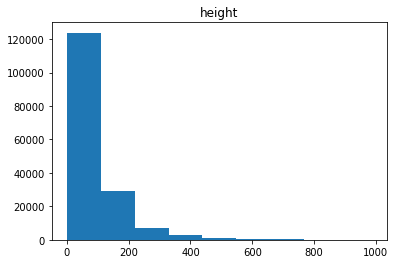

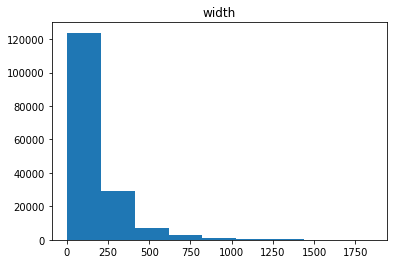

In [79]:
plt.hist(height,9)
#plt.axis([0, 200, 0, 6000])
plt.title('height')
plt.figure()
plt.hist(width,9)
#plt.axis([0, 500, 0, 6000])
plt.title('width')
